# Driver specific plot styling

Create some plots and show the usage of ``fastf1.plotting.get_driver_style``.


In [8]:
from matplotlib import pyplot as plt

import fastf1
from fastf1 import plotting
from pathlib import Path
# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme='fastf1')

Load the race session.



In [9]:
cache_dir = Path(r"C:\Users\aguse\OneDrive\Escritorio\PRY_AG\F1-analitics\Cache")

print(str(cache_dir))
fastf1.Cache.enable_cache(str(cache_dir))

C:\Users\aguse\OneDrive\Escritorio\PRY_AG\F1-analitics\Cache


In [10]:
race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

## Basic driver-specific plot styling
Plot all the laps for Hamilton, Russel, Perez and Verstappen.
Filter out slow laps as they distort the graph axis.
Note: as LapTime is represented by timedelta, calling ``setup_mpl`` earlier
is required.



req            INFO 	Using cached data for driver_info


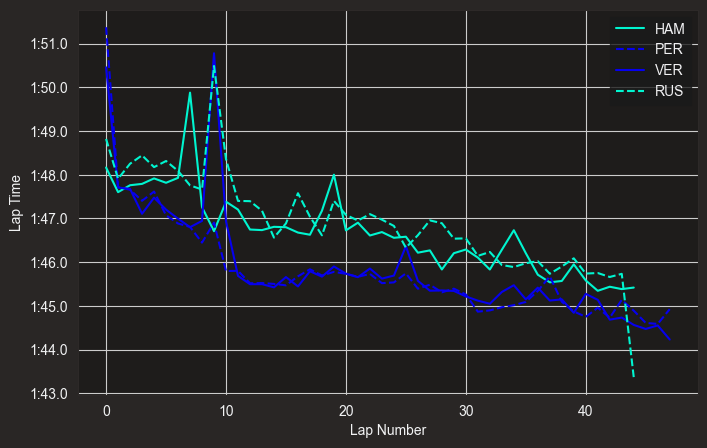

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()

## Sorting the legend
That plot looks pretty good already, but the order of the labels in the
legend is slightly chaotic. Instead of trying to order the labels manually,
use :func:`fastf1.plotting.add_sorted_driver_legend`.
Let's create the exact same plot again, but this time with a sorted legend
which means, we only change the very last function call.



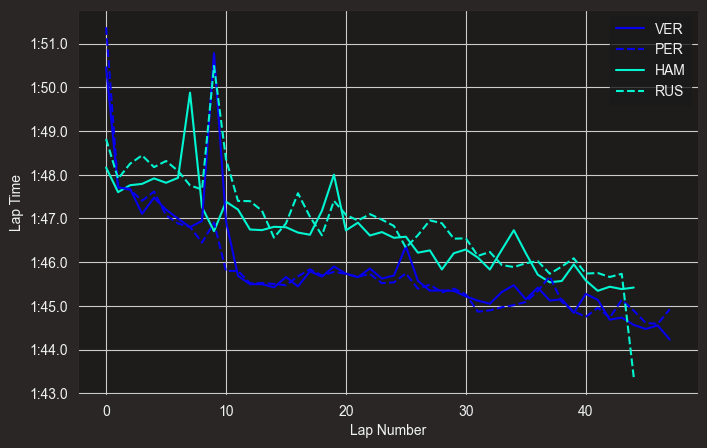

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)

## Creating fully custom styles
If you want to fully customize the plot style, you can define your own
styling variants.

Note that the value ``'auto'`` is treated as a magic keyword when used in
combination with a color. It will be replaced with the team color.

We define two styles, one for the first driver and one for the second driver
in any team.

The plot that is generated here isn't intended to be very readable, but it
shows how you can customize any plot styling parameter.



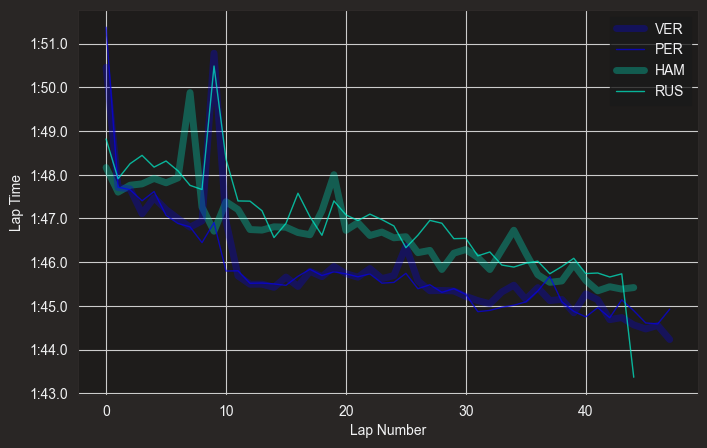

In [6]:
my_styles = [
    # style for each first driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 5, 'alpha': 0.3},
    # style for each second driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 1, 'alpha': 0.7}
]

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()

    # here, we now use ``style=my_style`` to use the custom styling
    style = plotting.get_driver_style(identifier=driver,
                                      style=my_styles,
                                      session=race)

    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
plt.show()